In [1]:
!date
!pwd

Вт дек 19 19:06:06 MSK 2017
/home/sphere/github/Sphere/Data2013


In [20]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#from tqdm import tqdm
#import math as mt
import numpy as np
import seaborn as sns

In [105]:
!ls ./data

10675.txt	flight1.dbg.2013.dat  flight3.dbg.dat
10675.txt.old	flight1.dbg.dat       flight4.dbg.2013.dat
10675.work.txt	flight2.dbg.2013.dat  flight4.dbg.dat
11588.dat	flight2.dbg.dat       flight5.dbg.2013.dat
datum_2013.csv	flight3.dbg.2013.dat  flight5.dbg.dat


In [14]:
datum = pd.read_csv('./data/11588.dat', header = None, index_col=False, sep=',')

In [15]:
datum.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
1,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0


168.63 [   1.            1.76897835    3.12928441    5.53563637    9.7924209
   17.32258057   30.64327002   54.20728127   95.89150704  169.63      ]
5


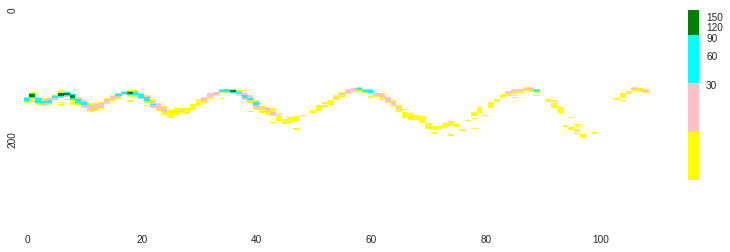

In [104]:
fig = plt.figure(figsize=(14,4))

ax3 = fig.add_subplot()
cpool = ['white','yellow','pink','cyan','green']
cmap = matplotlib.colors.ListedColormap(cpool) # Задаём дискретную шкалу цветов из списка cpool
cmap.set_over('red') # задаём цвет для значений, выходящих за рамки границы levels[-1] (сверху шкалы)
cmap.set_under('white') # задаём цвет для значений, выходящих за рамки границы levels[0] (снизу шкалы)

levels = 10**np.linspace(0, np.log10(np.max(np.max(datum))+1), 10)
print(np.max(np.max(datum)), levels)
print(cmap.N)

norm = matplotlib.colors.BoundaryNorm(levels, cmap.N) # Ставим границы для цветовых отрезков шкалы 

#cs = ax3.contourf(datum, levels, cmap=cmap, norm=norm, extend='both') 
cs = sns.heatmap(datum, vmin=0, cmap=cmap, norm=norm,xticklabels=20, yticklabels=200) #cmap="YlGnBu"
#cbar = fig.colorbar(cs, ax=ax3, spacing='proportional')  #,   # сделаем цветовые сегменты шкалы пропоциональными границам levels
                    #extendfrac='auto',   # изменим длину треугольных индикаторов
                    #shrink=0.9,   # уменьшим размер шкалы
                    #orientation='vertical') # можно изменить положение шкалы на горизонтальное (horizontal)


Major X-ticks locations: [   0.5   20.5   40.5   60.5   80.5  100.5]
Major X-ticks labels: <a list of 6 Text major ticklabel objects>
Major X-ticks tick lines: <a list of 12 Line2D ticklines objects>


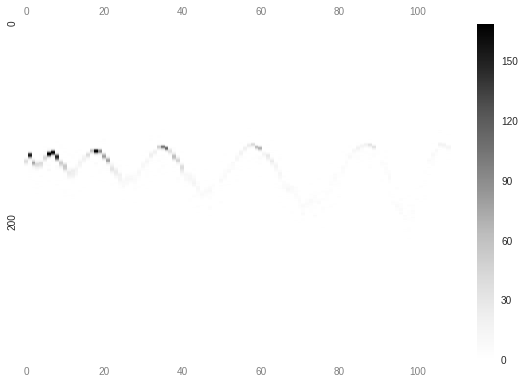

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)

cs = sns.heatmap(datum, vmin=0,  cmap = "Greys", xticklabels=20, yticklabels=200) #cmap="YlGnBu"
xax = ax.xaxis   # или xax = ax.get_xaxis()

xticks = ax.get_xticks()
xlocs = xax.get_ticklocs()
print ('Major X-ticks locations:', xlocs)
xlabels = xax.get_ticklabels()
print ('Major X-ticks labels:', xlabels)
xlines = xax.get_ticklines()
print ('Major X-ticks tick lines:', xlines)
ax.tick_params(axis='x', direction='out')
ax.tick_params(axis='x', which='major', direction='out',
                bottom=True, top=True, left=True, right=True, 
                color='blue', labelcolor='grey',
                labelbottom=True, labeltop=True, labelleft=True, labelright=True)
plt.tight_layout()

# Линии вспомогательной сетки (главные деления) только по оси абсцисс
ax.grid(True)

In [51]:
np.max(np.max(datum))

168.63

In [52]:
np.min(np.min(datum))

-3.0299999999999998

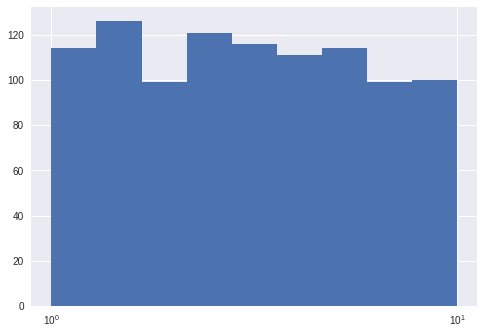

In [53]:
# generate some data on log-scale 
x = 10**np.random.uniform(size=1000) 
# histogram with log-bining 
plt.hist(x, bins=10**np.linspace(0, 1, 10)) 
plt.xscale('log') 
plt.show() 
############################## 

In [272]:
# считать данные, заменив 
na_values = ['NO CLUE', 'N/A', '0']
datum11588 = pd.read_csv('./data/11588.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11589 = pd.read_csv('./data/11589.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11308 = pd.read_csv('./data/11308.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum11452 = pd.read_csv('./data/11452.work.csv', na_values=na_values, header = None, index_col=False, sep=',')
datum12114 = pd.read_csv('./data/12114.work.csv', na_values=na_values, header = None, index_col=False, sep=',')

In [160]:
datum11468 = pd.read_csv('./data/11468.work.csv', header = None, index_col=False, sep=',')
datum11302 = pd.read_csv('./data/11302.work.csv', header = None, index_col=False, sep=',')

In [273]:
# убрать последние три канала
param = [i for i in range(109)]

datum11588 = datum11588[param]
datum11589 = datum11589[param]
datum11308 = datum11308[param]
datum11452 = datum11452[param]
datum12114 = datum12114[param]

In [274]:
datum11588.shape

(970, 109)

In [265]:
datum11589.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
968,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
969,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [510]:
# отрицательные значения заменить на маленькое положительное
minpos = 0.0001
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
for datum in data:
    for i in range(datum.shape[1]):
        zero_cell = datum[i] <= 3
        datum.loc[zero_cell, i] = minpos
    datum.fillna(0.001, inplace = True)

In [276]:
datum11589.tail(2)

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,108
968,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
969,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [544]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

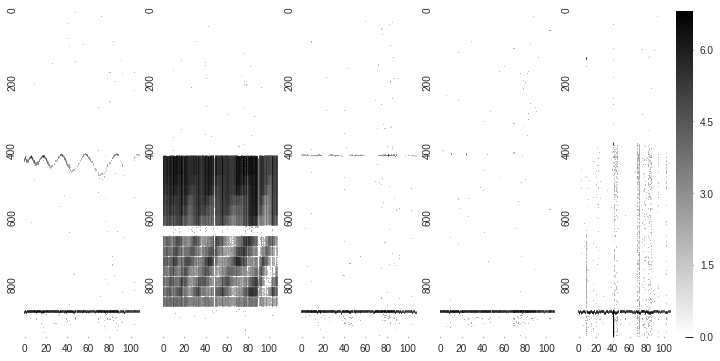

In [563]:
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
fig = plt.figure(figsize=(12,6))

n=150
cbar = False
for datum in data:
    n += 1
    ax = fig.add_subplot(n)
    if n == 155: 
        cbar = True
    cs = sns.heatmap(np.log(datum), vmin=0,   cmap = "gist_yarg", 
                     #cbar_kws={"orientation": "horizontal"},
                     cbar=cbar,
                     xticklabels=20, yticklabels=200)
#    cs = sns.heatmap(np.log(datum), vmin=0,   cmap = "Greys", xticklabels=20, yticklabels=200)

#cb = fig.colorbar()
#cb.set_label('log A')

plt.savefig('frames_bw.eps', bbox_inches='tight')
plt.savefig('frames_bw.pdf', bbox_inches='tight')

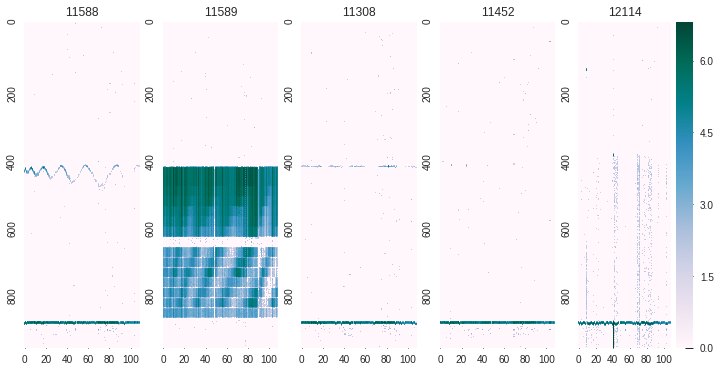

In [627]:
colorscale='PuBuGn' #"gist_yarg" #'BuPu' #  'GnBu'   #'viridis' #'Greys'
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
title = ['11588', '11589','11308','11452', '12114']
fig = plt.figure(figsize=(12,6))

n=150
cbar = False
for datum in data:
    n += 1
    ax = fig.add_subplot(n)

    if n == 155: 
        cbar = True 

    cs = sns.heatmap(np.log(datum), vmin=0, cmap = colorscale,
                     cbar = cbar,                    
                     xticklabels=20, yticklabels=200)
    ax.set_title(title[n-151])
    #plt.yticks(rotation=0)

#plt.savefig('frames_col.eps', bbox_inches='tight')
#plt.savefig('frames_col.pdf', bbox_inches='tight')

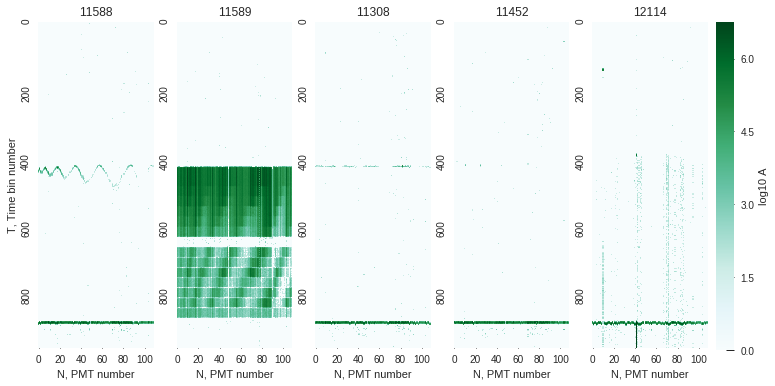

In [752]:
colorscale = "gist_yarg"
colorscale = "BuGn" #cool"
#colorscale='PuBuGn' #"gist_yarg" #'BuPu' #  'GnBu'   #'viridis' #'Greys'
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
title = ['11588', '11589','11308','11452', '12114']
fig = plt.figure(figsize=(12,6))

fig, axn = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(12,6))
cbar_ax = fig.add_axes([.91, .12, .02, .76])
cbar_kws = {"label":'log10 (A)'}
n=150
cbar = False

for (i, ax), datum in zip(enumerate(axn.flat), data):
    n += 1
    sns.heatmap(np.log(datum), ax=ax, cmap = colorscale,
                cbar=i == 0,
                vmin=0, 
                xticklabels=20, yticklabels=200,
                cbar_ax=None if i else cbar_ax,
                cbar_kws = None if i else cbar_kws,
               )
    ax.set_title(title[n-151])
    ax.set_xlabel('N, PMT number')
    if n == 151:
        ax.set_ylabel('T, Time bin number')

#'''
if colorscale == "gist_yarg":
    plt.savefig('frames_bw.pdf', bbox_inches='tight')
else:    
    plt.savefig('frames_col_bugn.pdf', bbox_inches='tight')
    #plt.savefig('frames_col.eps', bbox_inches='tight')
#'''

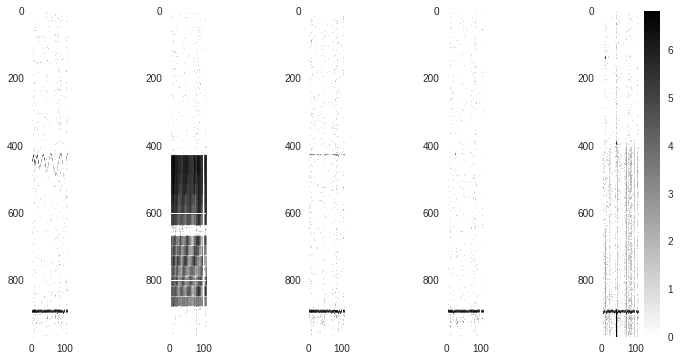

In [498]:
data = [datum11588, datum11589,datum11308, datum11452, datum12114]
fig = plt.figure(figsize=(12,6))

n=151
for datum in data:
    ax = fig.add_subplot(n)
    cs = plt.imshow(np.log(datum), cmap = "gist_yarg", vmin=0)
    #    cs = sns.heatmap(np.log(datum), xticklabels=20, yticklabels=200)
    n += 1
plt.colorbar(cs)
cbar_kws={"orientation": "horizontal"}

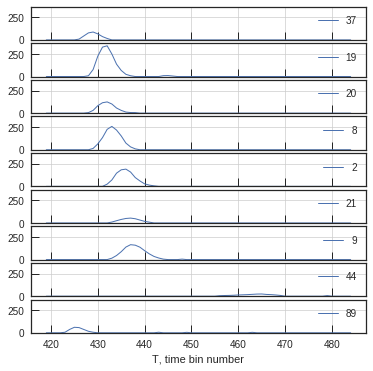

In [836]:
data = [1, 2, 8, 7, 6, 17, 18]
data = [17, 18, 7, 6, 1, 8, 2]
data = [36, 18, 19,7,  1, 20, 8, 43, 88]

fig = plt.figure(figsize=(6,6))

n = len(data) * 100 + 10
xmin = 419 #390
xmax = 485 #70
for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum11588[i][xmin:xmax], label = str(i+1))
    plt.ylim(0,370)
    plt.legend()
    plt.grid()
    
plt.xlabel('T, time bin number')
fig.subplots_adjust(hspace = 0.1)

plt.savefig('event_channels.eps', bbox_inches='tight')

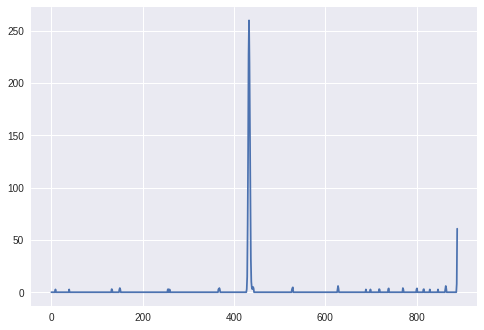

In [469]:
plt.plot(datum11588[7][:890])

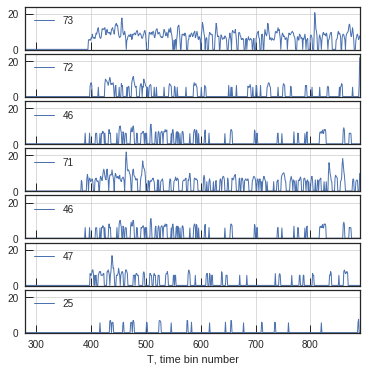

In [829]:
data = [72, 71, 45,70,  45, 46, 24]

fig = plt.figure(figsize=(6,6))

n=710
ymax = 891
for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum12114[i][280:ymax]+0.1, label = str(i+1))
    plt.ylim(0)
    plt.xlim(280,ymax)
    plt.ylim(0,24)
    plt.legend(loc = 2) 
    plt.grid()
    
plt.xlabel('T, time bin number')
fig.subplots_adjust(hspace = 0.1)

plt.savefig('door_channels.eps', bbox_inches='tight')

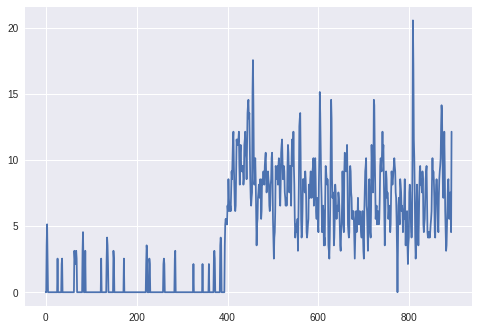

In [460]:
plt.plot(datum12114[72][:894])

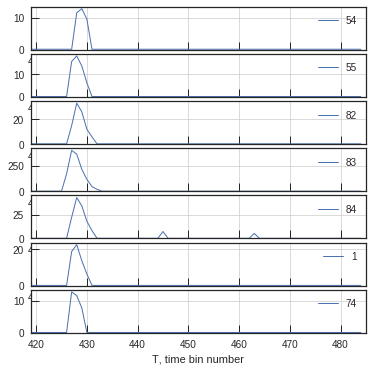

In [840]:
data = [72, 71, 45,70,  45, 46, 24]
data = [53, 54, 81, 82, 83, 0, 73]

fig = plt.figure(figsize=(6,6))

n=710
xmin = 419 #390
xmax = 448 #70
xmin = 419 #390
xmax = 485 #70

for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum11308[i][xmin:xmax]+0.1, label = str(i+1))
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.legend(loc = 1)
    plt.grid()
    
plt.xlabel('T, time bin number')
fig.subplots_adjust(hspace = 0.1)

plt.savefig('line_channels.eps', bbox_inches='tight')

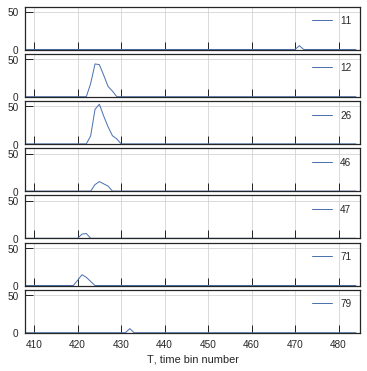

In [824]:
data = [10, 11, 25, 45, 46, 70, 78]

fig = plt.figure(figsize=(6,6))

n=710
xmin = 419 #390
xmax = 448 #70
xmin = 408 #390
xmax = 485 #70

for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum11452[i][xmin:xmax]+0.1, label = str(i+1))
    plt.ylim(0)
    plt.xlim(xmin,xmax)
    plt.ylim(0,57)
    plt.legend(loc = 1) 
    plt.grid()
    
plt.xlabel('T, time bin number')
fig.subplots_adjust(hspace = 0.1)

plt.savefig('noise_channels.eps', bbox_inches='tight')

ValueError: num must be 1 <= num <= 35, not 0

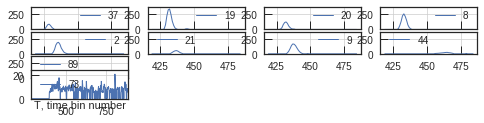

In [842]:
fig = plt.figure(figsize=(8,4))

data = [36, 18, 19,7,  1, 20, 8, 43, 88]

n = len(data) * 100 + 40
xmin = 419 #390
xmax = 485 #70
for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum11588[i][xmin:xmax], label = str(i+1))
    plt.ylim(0,370)
    plt.legend()
    plt.grid()
    
plt.xlabel('T, time bin number')
fig.subplots_adjust(hspace = 0.1)

data = [72, 71, 45,70,  45, 46, 24]
n=748
ymax = 891
for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum12114[i][280:ymax]+0.1, label = str(i+1))
    plt.ylim(0)
    plt.xlim(280,ymax)
    plt.ylim(0,24)
    plt.legend(loc = 2) 
    plt.grid()
    
plt.xlabel('T, time bin number')
fig.subplots_adjust(hspace = 0.1)


IndexError: too many indices for array

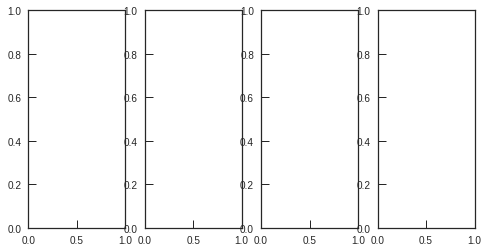

In [855]:
# Four axes, returned as a 2-d array
fig = plt.figure(figsize=(8,4))
f, axarr = plt.subplots(1, 4)

data = [36, 18, 19,7,  1, 20, 8, 43, 88]
n = len(data) * 100 + 10
xmin = 419 #390
xmax = 485 #70

axarr[0,1] = plt.figure()
for i in data:
    n += 1
    ax = fig.add_subplot(n)
    plt.plot(datum11588[i][xmin:xmax], label = str(i+1))
    plt.ylim(0,370)
    plt.legend()
    plt.grid()    
plt.xlabel('T, time bin number')

#axarr[0, 0].plot(x, y)
#axarr[0, 0].set_title('Axis [0,0]')
#axarr[0, 1].scatter(x, y)
#axarr[0, 1].set_title('Axis [0,1]')
#axarr[1, 0].plot(x, y ** 2)
#axarr[1, 0].set_title('Axis [1,0]')
#axarr[1, 1].scatter(x, y ** 2)
#axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

f.subplots_adjust(hspace = 0)

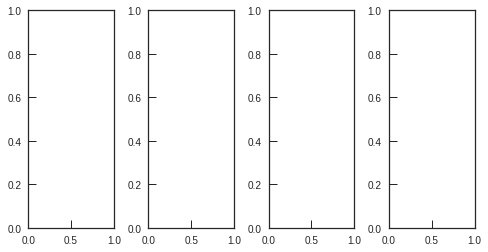

In [857]:
grid = plt.GridSpec(7, 4, wspace=0.4, hspace=0.3)
plt.subplot(grid[:, 0])
plt.subplot(grid[:, 1])
plt.subplot(grid[:, 2])
plt.subplot(grid[:, 3]);